In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = pd.read_csv('data.csv')
data = data[data.columns[:-1]]
data = data[data['Wait time']>=0]
data = data[data['Customer']>999]

In [132]:
data

,Customer,Time of arrival,Number of people at arrival,Number of people currently in queue at arrival,Which 10 min interval in day,Which day in week,Time of start of service,Departure time,Wait time
1000,1000,13996.5,3,0,103,9,13996.5,14018.8,0.00000
1001,1001,14000.2,4,0,104,9,14000.2,14042.0,0.00000
1002,1002,14009.3,5,0,104,9,14009.3,14038.2,0.00000
1003,1003,14038.3,2,0,107,9,14038.3,14083.7,0.00000
1004,1004,14044.0,2,0,108,9,14044.0,14064.7,0.00000
...,...,...,...,...,...,...,...,...,...
5004,5004,71274.3,11,7,71,49,71329.8,71374.2,55.47660
5005,5005,71283.3,11,7,72,49,71335.6,71348.9,52.35940
5006,5006,71312.9,9,5,75,49,71344.6,0.0,31.64840
5007,5007,71342.0,6,2,78,49,71348.9,0.0,6.86719


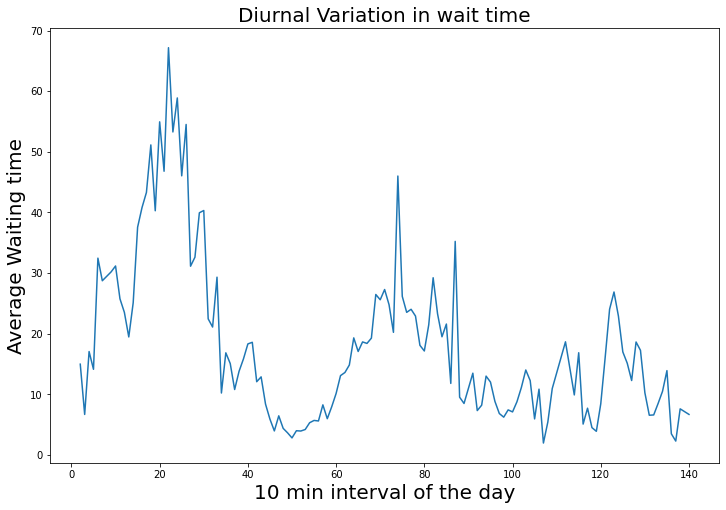

In [133]:
temp = data[data['Wait time']>0].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.show()

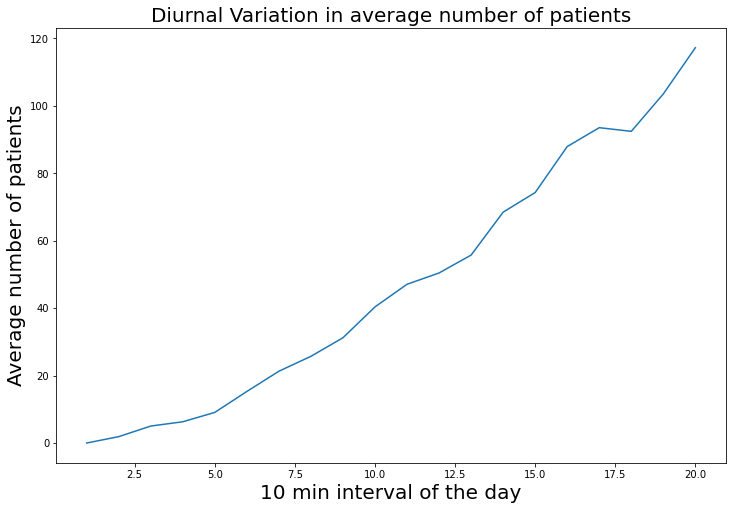

In [134]:
temp = data.groupby(by='Number of people at arrival').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in average number of patients',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average number of patients',fontsize=20)
# plt.grid(True)
plt.show()

In [0]:
def C(t):
    if t<10:
        return 3
    elif t<120:
        return 2
    elif t<7*60+30:
        return 1
    elif t<10*60:
        return 2
    elif t<10*60+20:
        return 3
    elif t<14*60+30:
        return 4
    elif t<18*60 +30:
        return 5
    elif t<20*60:
        return 4
    else:
        return 3

In [136]:
from sklearn import linear_model
X = data[['Number of people at arrival','Number of people currently in queue at arrival']]
Y = data['Wait time'].to_numpy()
def f(x):
    n = x['Number of people at arrival']
    t = x['Time of arrival']
    return 1.0*n/C( (t-int(t))+int(t)%1440 )
def g(x):
    n = x['Number of people currently in queue at arrival']
    t = x['Time of arrival']
    return 1.0*n/C( (t-int(t))+int(t)%1440 )
    
X['F1'] = data.apply(f, axis=1)
X['F2'] = data.apply(g, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
week = pd.get_dummies(data['Which day in week'].apply(lambda x:x%7),prefix='day:').to_numpy()

In [0]:
day = pd.get_dummies(data['Which 10 min interval in day'],prefix='10 min interval:').to_numpy()

In [0]:
X = np.concatenate((X.to_numpy(),week,day),axis=1)

In [140]:
X.shape

(4009, 155)

In [144]:
# reg = linear_model.LinearRegression()
reg = linear_model.Ridge(alpha=.5)
# reg = linear_model.Lasso(alpha=.1)
reg.fit(X,Y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [145]:
data['Predictions'] = reg.predict(X)
data

,Customer,Time of arrival,Number of people at arrival,Number of people currently in queue at arrival,Which 10 min interval in day,Which day in week,Time of start of service,Departure time,Wait time,Predictions
1000,1000,13996.5,3,0,103,9,13996.5,14018.8,0.00000,0.086827
1001,1001,14000.2,4,0,104,9,14000.2,14042.0,0.00000,-0.208795
1002,1002,14009.3,5,0,104,9,14009.3,14038.2,0.00000,-0.360011
1003,1003,14038.3,2,0,107,9,14038.3,14083.7,0.00000,-0.021238
1004,1004,14044.0,2,0,108,9,14044.0,14064.7,0.00000,0.044917
...,...,...,...,...,...,...,...,...,...,...
5004,5004,71274.3,11,7,71,49,71329.8,71374.2,55.47660,46.569869
5005,5005,71283.3,11,7,72,49,71335.6,71348.9,52.35940,45.359527
5006,5006,71312.9,9,5,75,49,71344.6,0.0,31.64840,34.239020
5007,5007,71342.0,6,2,78,49,71348.9,0.0,6.86719,13.897769


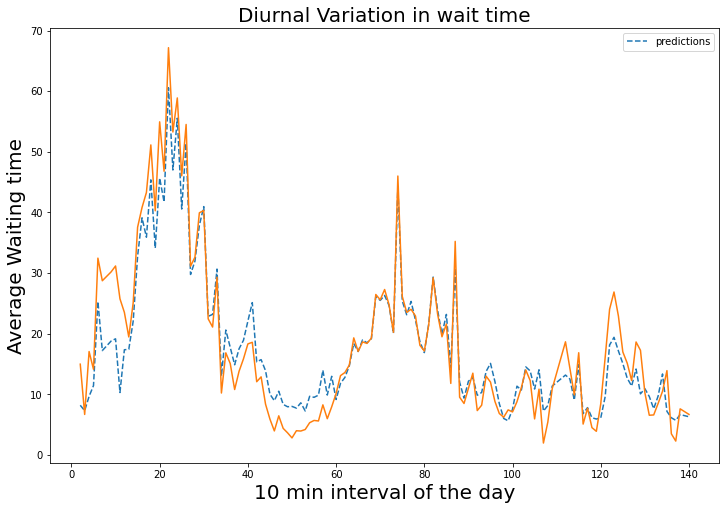

In [146]:
temp = data[data['Wait time']>0].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Predictions'],'--',label='predictions')
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.legend()
plt.show()

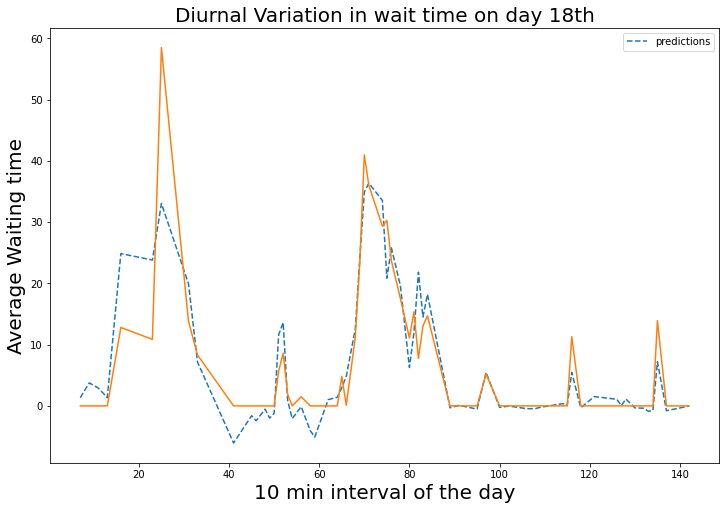

In [153]:
temp = data[data['Which day in week']==18].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Predictions'],'--',label='predictions')
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time on day 18th',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.legend()
plt.show()